In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [4]:
df=pd.read_csv('D:\ANKIT\GraduateAdmissions\data\Admission_Predict_Ver1.1.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("dark_background")

In [103]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

Plot below we can clearly identify that **<8** are danger. Universities seem to love students with **higher CGPA :(** , thus becoming an important factor for unis.
However,rest assured other factors are important too we we will talk more on that later

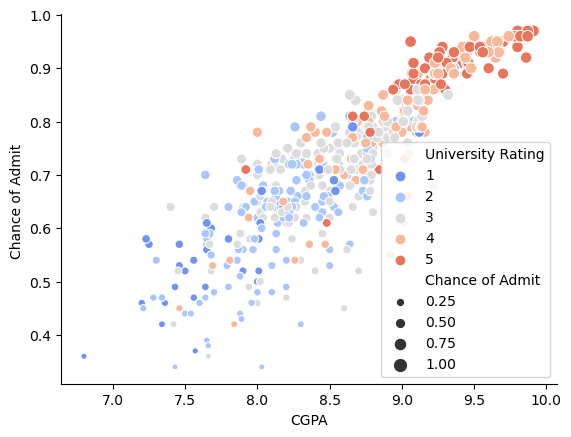

In [156]:
#plt.figure(figsize=(8,10))
#sns.set_style({"figure.facecolor": "white",})
sns.scatterplot(x='CGPA',y='Chance of Admit ',data=df,size='Chance of Admit ',palette=sns.color_palette("coolwarm",5),hue='University Rating')
sns.despine()

* Let us now find out **Research Focus**\
  Clearly many opted for research and many didn't

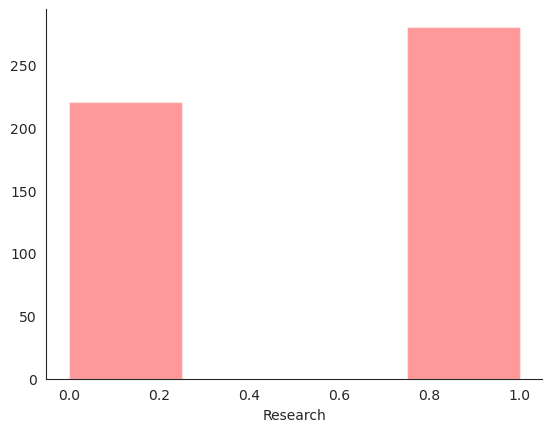

In [226]:
sns.set_style('white')
sns.distplot(df.Research,label='RRRR',kde=False,color='r')
sns.despine()

It's pretty clear that you need to have some research experience since **most having 65% or Greater** all seem to have research experience with exceptions of few.  

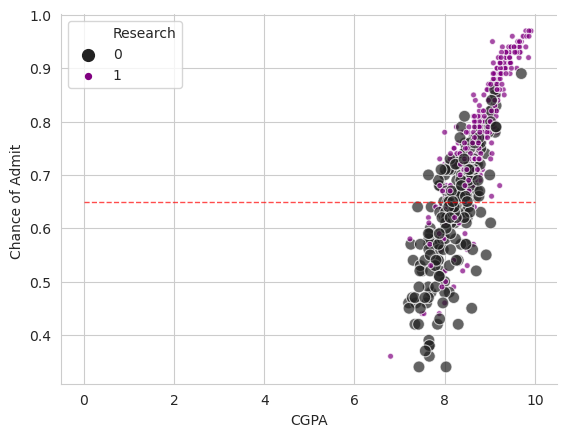

In [224]:
sns.set_style('whitegrid')
sct=sns.scatterplot(x='CGPA',y='Chance of Admit ',data=df,size='Research',palette=sns.dark_palette('purple',2),hue='Research',alpha=0.7)
sct.axes.hlines(y=0.65, xmin=0, xmax=10, linewidth=5, color='r',alpha=0.7,linestyles='--', lw=1)
sns.despine()

In [154]:
unique_Uni=list(set(df['University Rating'].values))

So there were **184** different CPGA values due to various factors namely:
* *considering CGPA values were not rounded to nearest decimal place leading to such similar scores* 
* Dataset is of **500** entries which is a good representation ,but not necessarily **extremely accurate**

* There ,might be many variations in larger datasets due to *shear student variety* such as increase in number of students with lesser CGPA but with better potential getting accepted.
i.e more density increase in head and tail possibly.
Obviously, there are more anomalies and outlies.



In [151]:
unique_CGPA=list(set(df['CGPA'].values))
len(list(set(df['CGPA'].values)))
print(unique_CGPA)

[6.8, 7.9, 8.9, 8.28, 8.03, 8.7, 8.87, 9.65, 8.67, 8.21, 8.0, 9.34, 9.0, 9.27, 7.5, 7.68, 7.43, 7.25, 7.57, 8.5, 8.46, 8.68, 8.25, 8.64, 9.46, 9.5, 9.04, 9.36, 9.64, 9.18, 9.32, 9.11, 9.43, 9.07, 8.55, 8.49, 8.74, 8.24, 8.43, 8.18, 8.86, 8.37, 9.14, 9.74, 9.68, 9.87, 9.62, 7.54, 7.36, 7.86, 7.97, 7.79, 8.96, 8.71, 8.65, 8.15, 8.84, 8.09, 8.53, 9.53, 7.4, 7.65, 9.78, 8.4, 8.72, 8.22, 8.47, 8.12, 9.4, 9.22, 8.62, 8.76, 9.76, 9.08, 9.12, 9.15, 9.44, 9.01, 8.06, 8.17, 8.75, 8.69, 8.94, 8.44, 9.06, 7.3, 7.8, 9.31, 7.87, 7.94, 9.25, 7.69, 9.19, 9.66, 8.97, 8.16, 8.35, 8.04, 8.54, 8.79, 7.66, 7.84, 7.98, 7.34, 7.23, 8.2, 8.66, 8.34, 8.3, 8.8, 9.7, 9.8, 9.2, 9.3, 9.02, 9.16, 9.05, 9.45, 9.48, 9.23, 9.91, 9.54, 8.88, 8.13, 8.73, 8.32, 8.07, 8.57, 8.26, 8.01, 7.2, 7.7, 7.88, 8.45, 7.95, 7.56, 7.45, 8.95, 7.81, 9.13, 9.82, 9.26, 9.47, 7.67, 7.42, 7.6, 7.92, 8.48, 8.98, 8.23, 8.6, 8.1, 8.85, 8.56, 8.92, 9.1, 9.6, 8.42, 9.24, 8.78, 9.38, 9.56, 8.36, 9.35, 9.28, 9.92, 9.42, 9.17, 9.67, 9.86, 7.46, 7

Let's visualize the data distribution of CGPA
Ok wow seems like most of the population h

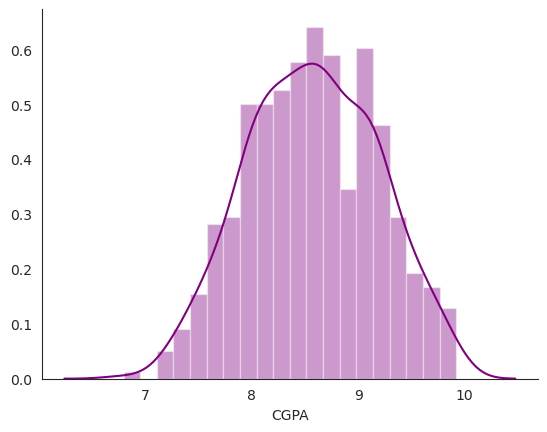

In [234]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df.CGPA,bins=20, color="purple")
sns.despine()

In [255]:
print("Mean CGPA:{}, Variance in CGPA is by {}%".format(df.CGPA.mean()*10,df.CGPA.var()*10))
df.CGPA.mode()

Mean CGPA:85.76440000000004, Variance in CGPA is by 3.6579852344689345%


0    8.00
1    8.76
dtype: float64

TOEFL Scores are wierdly similar

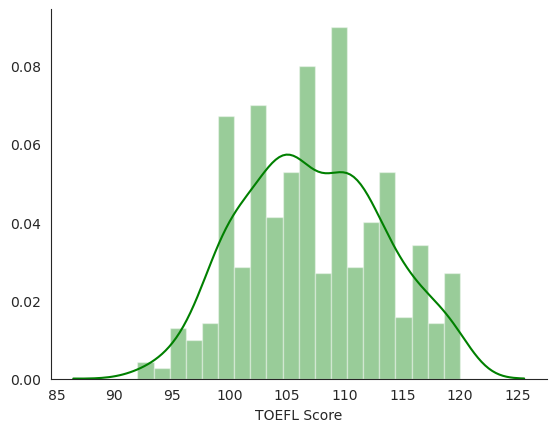

In [261]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df['TOEFL Score'],bins=20, color="green")
sns.despine()

In [115]:
len(list(set(df['TOEFL Score'].values)))

29

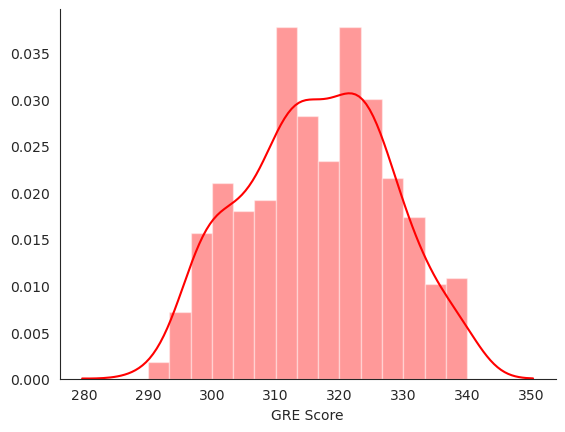

In [269]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df['GRE Score'],bins=15, color="red")
sns.despine()

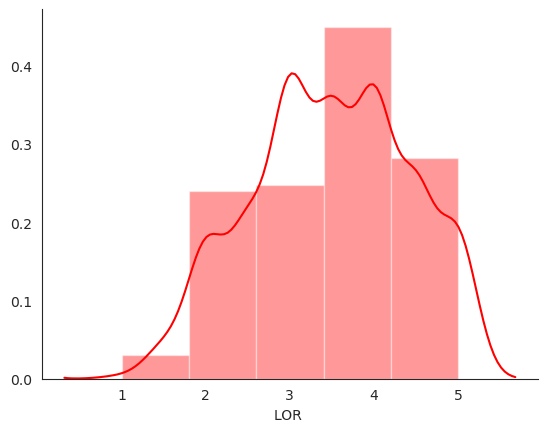

In [267]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df['LOR '],bins=5, color="red")
sns.despine()

In [279]:
c_1=df[(df['Research']==1) & (df['Chance of Admit ']>0.7)]
len(df[(df['Research']==1) & (df['Chance of Admit ']>0.7)])

221

Looks like 300 people who have 8 CGPA or above seem to have 70% or higher chance

In [281]:
c_2=df[(df['Chance of Admit ']>=0.70)&(df['CGPA']>=0.8)]
len(df[(df['Chance of Admit ']>=0.70)&(df['CGPA']>=0.8)])

300

Strangely enough research variable is correlated pretty less compared to others.
I think LORs would usually be gained as a result of research experience therefore having a higher impact .

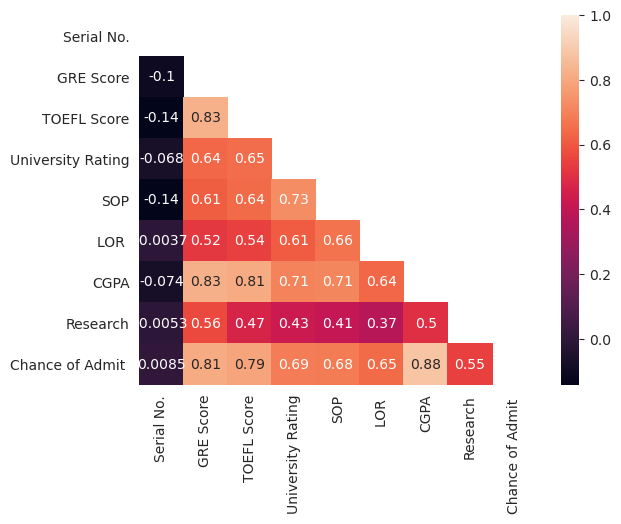

In [297]:
mask = np.zeros_like(df.corr().values)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df.corr(),annot=True,mask=mask)

In [303]:
import xgboost